<a href="https://colab.research.google.com/github/VovaZubiak/spam-filter/blob/main/spamfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: uk (Ukrainian):
| Processor | Package     |
---------------------------
| tokenize  | iu          |
| mwt       | iu          |
| pos       | iu_charlm   |
| lemma     | iu_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



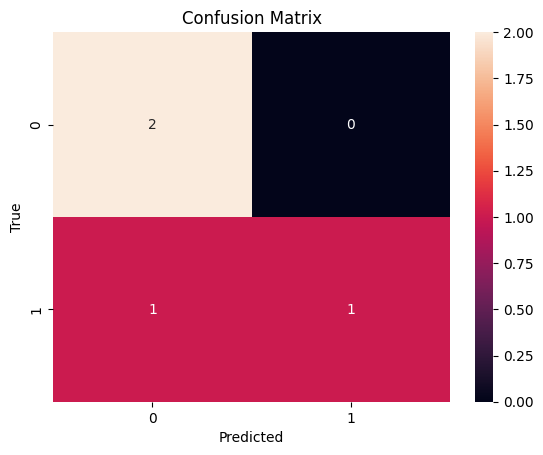

In [ ]:
import nltk
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


import stanza
nlp = stanza.Pipeline(lang='uk', processors='tokenize,mwt,pos,lemma')


class SpamFilter():

  ukr_stopwords = {
      'і', 'в', 'у', 'на', 'що', 'з', 'до', 'та', 'за', 'як', 'це', 'але',
      'я', 'ти', 'ми', 'ви', 'вони', 'про', 'й', 'чи', 'для', 'ж', 'бо',
      'від', 'під', 'без', 'так', 'є', 'ще', 'між', 'тому', 'саме'
  }

  def __init__(self):
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('punkt_tab')

    self.stop_words = set(stopwords.words('english'))
    self.stop_words.update(self.ukr_stopwords)


  def clean_text(self, text):
      text = text.lower()
      text = ''.join([char for char in text if char not in string.punctuation])
      lemmas = [word.lemma for sent in nlp(text).sentences for word in sent.words if word.text not in self.stop_words]
      return ' '.join(lemmas)


  def vectorize(self, df):
    X = self.cv.fit_transform(df['clean_text'])
    y = df['label'].map({'ham': 0, 'spam': 1})

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return (X_train, y_train), (X_test, y_test)


  def load_data(self, df):
    self.cv = CountVectorizer(max_features=5000)
    df['clean_text'] = df['text'].apply(self.clean_text)
    self.train_set, self.test_set = self.vectorize(df)


  def train_model(self):
    #self.model = LogisticRegression()
    self.model = MultinomialNB()
    #self.model = RandomForestClassifier(n_estimators=200, random_state=42)
    X_train, y_train = self.train_set
    self.model.fit(X_train, y_train)


  def test_model(self):
    X_test, y_test = self.test_set
    y_pred = self.model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


  def predict_spam(self, text):
      cleaned = self.clean_text(text)
      vectorized = self.cv.transform([cleaned])
      prediction = self.model.predict(vectorized)
      return "SPAM" if prediction[0] == 1 else "HAM (не спам)"


#uploaded = files.upload()
df = pd.read_csv("confe_spam.csv")
df.head()

spam_filter = SpamFilter()
spam_filter.load_data(df)
spam_filter.train_model()
spam_filter.test_model()


# Новий розділ

In [ ]:

examples = ["Інформаційний Лист КонференціїШановні Колеги!Запрошуємо Вас взяти участь у роботіXI Міжнародної науково-практичної дистанційної конференціїCurrent Trends in Scientific Research Developmentяка відбудеться 5-7 червня 2025 р.у м. Бостон, США.Перейти на Сайт КонференціїУ науковій конференції візьмуть участь представники навчальних закладів і установ з усього світу.Форма участі у конференції: дистанційна.Персональний СЕРТИФІКАТ кожному учаснику конференціїПрийом робіт до 4 червня 2025Збірник статей конференції буде надіслано до 17 червня 2025Інформаційний Лист КонференціїОсновні Напрямки Роботи Конференції:СЕКЦІЯ 01. Сільськогосподарські науки.СЕКЦІЯ 02. Ветеринарні науки.СЕКЦІЯ 03. Біологічні науки.СЕКЦІЯ 04. Медичні науки.СЕКЦІЯ 05. Фармацевтичні науки.СЕКЦІЯ 06. Хімічні науки.СЕКЦІЯ 07. Технічні науки.СЕКЦІЯ 08. Фізико-математичні науки.СЕКЦІЯ 09. Географічні науки.СЕКЦІЯ 10. Геолого-мінералогічні науки.СЕКЦІЯ 11. Архітектура.СЕКЦІЯ 12. Астрономія.СЕКЦІЯ 13. Педагогічні науки.Вимоги до Оформлення СтатейСЕКЦІЯ 14. Психологічні науки.СЕКЦІЯ 15. Соціологічні науки.СЕКЦІЯ 16. Журналістика.СЕКЦІЯ 17. Мистецтвознавство.СЕКЦІЯ 18. Історичні науки.СЕКЦІЯ 19. Культурологія.СЕКЦІЯ 20. Література.СЕКЦІЯ 21. Політичні науки.СЕКЦІЯ 22. Філологічні науки.СЕКЦІЯ 23. Філософські науки.СЕКЦІЯ 24. Економічні науки.СЕКЦІЯ 25. Юридичні наукиІнформаційний Лист",
            "Університетський коледж Бахрейну радий представити Міжнародну конференцію UCB (UCB2025) «Сталий розвиток бізнесу: інновації для більш зеленого майбутнього» – престижний захід, що слугує платформою для науковців, представників галузі, експертів з технологій та осіб, що приймають рішення, як з приватного, так і з державного секторів. Ця конференція має на меті стимулювати цікаві дискусії, сприяти співпраці та поглибити розуміння критичних питань, що стосуються інновацій та технологій у Бахрейні, регіоні та світі загалом. UCB2025, запланована на 23-24 квітня 2025 року в готелі Ritz-Carlton у Бахрейні, має стати значною зустріччю впливових умів, які сприятимуть розвитку бізнесу та технологій у світовому масштабі. Теми конференції: Програма конференції UCB2025 охоплює широкий спектр тем, включаючи, але не обмежуючись: Практики зеленого обліку для сталого розвитку бізнесу Технологічні рішення для сталого розвитку Цифрові медіа та комунікації Інновації у відновлюваній енергії та чистих технологіях Підприємницькі можливості в циркулярній економіці Інноваційні моделі фінансування для екологічно чистих ініціатив Маркетингові стратегії для стійких продуктів та послуг Циркулярна економіка та управління сталим ланцюгом поставок Етичне лідерство у просуванні екологічної відповідальності Технологічні інновації Стимулювання зелених бізнес-практик Корпоративна соціальна відповідальність та вплив на навколишнє середовище Поведінка споживачів щодо сталих брендів Політичні наслідки для створення більш зеленого бізнес-середовища Соціальне підприємництво для сталого соціального впливу Дизайн-мислення, освіта та сталий вплив на навколишнє середовище Сталі міста та розумне міське планування Блокчейн та децентралізовані технології для сталого розвитку Штучний інтелект та машинне навчання для сталого розвитку Стале сільське господарство та продовольчі системи Стала мода та текстиль Екотуризм та сталий туризм Стале управління ланцюгом поставок та логістика Зелене фінансування та інвестиції для сталого розвитку Стала освіта та навчання протягом усього життя для сталого розвитку. Участь для дослідників та докторантів: UCB2025 визнає важливість підтримки наступного покоління науковців. Конференція надає підтримку докторантам, включаючи: Комплексне покриття до 3 місць для докторантів, включаючи: Реєстраційні внески та внески до публікацій. Витрати на проїзд. Витрати на проживання. Оформлення віз. Допомога в оформленні віз для всіх учасників з-за меж Бахрейну. Покриття, що надається докторантам, залежатиме від рецензій на наукові статті, подані докторантами. Стипендії призначені для підтримки видатних докторських досліджень та надання можливостей докторантам взяти участь у конференції. Ми заохочуємо докторантів подавати свої дослідницькі статті на розгляд. Можливість публікації: UCB2025 пропонує виняткову можливість публікації для дослідників та науковців. Усі прийняті статті на конференції будуть опубліковані у збірнику матеріалів конференції, які видаються Springer Publishing та внесені до Scopus. Окрім матеріалів конференції, вибрані наукові статті конференції матимуть можливість бути опубліковані у спеціальних випусках престижних наукових журналів. До цих журналів належать: Journal of Strategic Marketing, Special Issue – Taylor & Francis (Scopus, Q1). Journal of Financial Reporting and Accounting, Special Issue – Emerald Publishing (Scopus, Q2). FIIB Business Review, регулярний випуск, SAGE Publications (ABS, Scopus, Q3). Discover Sustainability Journal, спеціальний випуск - Springer (Emerging Sources Citation Index (ESCI), SCOPUS та DOAJ). Journal of Business and Socio-economic Development (JBSED), спеціальний випуск - Emerald (Scopus). EuroMid Journal of Business and Tech-Innovation (EJBTI), спеціальний випуск - EMBAT. Важливі дати: Кінцевий термін подання доповідей: 10 квітня 2025 року. Кінцевий термін реєстрації та оплати внеску: 19 квітня 2025 року. Дати проведення конференції: 23-24 квітня 2025 року."]
for example in examples:
  print(f"{spam_filter.predict_spam(example)} - {example}")

SPAM - Інформаційний Лист КонференціїШановні Колеги!Запрошуємо Вас взяти участь у роботіXI Міжнародної науково-практичної дистанційної конференціїCurrent Trends in Scientific Research Developmentяка відбудеться 5-7 червня 2025 р.у м. Бостон, США.Перейти на Сайт КонференціїУ науковій конференції візьмуть участь представники навчальних закладів і установ з усього світу.Форма участі у конференції: дистанційна.Персональний СЕРТИФІКАТ кожному учаснику конференціїПрийом робіт до 4 червня 2025Збірник статей конференції буде надіслано до 17 червня 2025Інформаційний Лист КонференціїОсновні Напрямки Роботи Конференції:СЕКЦІЯ 01. Сільськогосподарські науки.СЕКЦІЯ 02. Ветеринарні науки.СЕКЦІЯ 03. Біологічні науки.СЕКЦІЯ 04. Медичні науки.СЕКЦІЯ 05. Фармацевтичні науки.СЕКЦІЯ 06. Хімічні науки.СЕКЦІЯ 07. Технічні науки.СЕКЦІЯ 08. Фізико-математичні науки.СЕКЦІЯ 09. Географічні науки.СЕКЦІЯ 10. Геолого-мінералогічні науки.СЕКЦІЯ 11. Архітектура.СЕКЦІЯ 12. Астрономія.СЕКЦІЯ 13. Педагогічні науки.Вимо